In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import butter, lfilter , filtfilt
import pandas as pd
import scipy as sp
import os
import sys
import seaborn as sb 
from matplotlib import cm
import ruptures as rpt
import pickle

# Load the data

In [2]:
# Root folder for the data
data_folder = "/Users/nealarohner/Desktop/Data"
#Load the data
subject = 'MR012'
data_file = 'MR012_FM_aligned.mat'
data_file_path = os.path.join(data_folder,data_file)
verbose=1
data_key='data'
amplitudes_key='amplitudes'
fs = 1259.3
dt = 1/fs

In [3]:
root_data_matlab_struct = loadmat(data_file_path,struct_as_record=False,squeeze_me=True)
root_data_re_struct = loadmat(data_file_path)
# Because of the saving from Matlab there are arrays of size 1 containing the data
data_raw = root_data_re_struct[data_key][0][0]
# Not veru pretty but it extracts the electrodes configuration names 
elec_names = root_data_re_struct[data_key].dtype.names
# As well as the recorded muscles names
muscle_and_other_names = data_raw[0][0][0].dtype.names

In [4]:
if verbose>1: print(elec_names)
if verbose>1: print(muscle_and_other_names)

In [5]:
n_elec_configs = len(elec_names)
n_muscles_and_other = len(muscle_and_other_names)

In [6]:
list_elec_config_dfs = []

for i_elec_config in range(n_elec_configs):       
    elec_config_i = elec_names[i_elec_config]
    if verbose: print(elec_config_i)
    elect_config_i_data = data_raw[elec_config_i][0,0] 
    list_muscle_and_other_elec_config_dfs = []
    list_amplitudes_elec_config=[]
    for i_muscle_and_other in range(n_muscles_and_other):
        muscle_and_other_i = muscle_and_other_names[i_muscle_and_other]
        if verbose: print(muscle_and_other_i)
        muscle_and_other_i_data = elect_config_i_data[muscle_and_other_i]
        n_trials_elec_muscle_and_other_i = np.shape(muscle_and_other_i_data)[-1]
        if verbose: print("N_trials",n_trials_elec_muscle_and_other_i)
        if muscle_and_other_i==amplitudes_key:
            # If it is the special case of amplitudes
            list_amplitudes_elec_config = muscle_and_other_i_data[0,:]      
        else:
            # Not amplitudes
            list_trial_muscle_and_other_elec_config_dfs = []
            for i_trial_elec_muscle_and_other in range(n_trials_elec_muscle_and_other_i):
                if verbose>1: print("trial",i_trial_elec_muscle_and_other)
                trial_muscle_and_other_i_data = muscle_and_other_i_data[0,i_trial_elec_muscle_and_other][0,:]
                n_time_points_trial = len(trial_muscle_and_other_i_data)
                df_trial_muscle_and_other_i_data = pd.DataFrame(data=[[trial_muscle_and_other_i_data]],columns=['Raw'])
                df_trial_muscle_and_other_i_data['Time_points'] = n_time_points_trial
                df_trial_muscle_and_other_i_data['Muscle_or_other'] = muscle_and_other_i
                df_trial_muscle_and_other_i_data['Elec_config'] = elec_config_i
                df_trial_muscle_and_other_i_data['Subject'] = subject
                list_trial_muscle_and_other_elec_config_dfs.append(df_trial_muscle_and_other_i_data)
            if len(list_trial_muscle_and_other_elec_config_dfs)>0:
                df_muscle_or_others = pd.concat(list_trial_muscle_and_other_elec_config_dfs, ignore_index=True)
                df_muscle_or_others.reset_index(inplace=True)
                df_muscle_or_others = df_muscle_or_others.rename(columns = {'index':'Trial_number'})
                list_muscle_and_other_elec_config_dfs.append(df_muscle_or_others)
    # Adds the amplitude to each trial
    n_muscles_and_other_elec_config_dfs = len(list_muscle_and_other_elec_config_dfs)
    for i_muscles_and_other_elec_config_df in range(n_muscles_and_other_elec_config_dfs):
        muscles_and_other_elec_config_df_i = list_muscle_and_other_elec_config_dfs[i_muscles_and_other_elec_config_df]
        muscles_and_other_elec_config_df_i['Amplitudes']=list_amplitudes_elec_config
        list_muscle_and_other_elec_config_dfs[i_muscles_and_other_elec_config_df] = muscles_and_other_elec_config_df_i
    if len(list_muscle_and_other_elec_config_dfs)>0:
        df_elec_config = pd.concat(list_muscle_and_other_elec_config_dfs, ignore_index=True)
        list_elec_config_dfs.append(df_elec_config)
if len(list_elec_config_dfs)>0:
    df_subject = pd.concat(list_elec_config_dfs, ignore_index=True)

Elec01_
LST
N_trials 95
RST
N_trials 95
LTA
N_trials 95
LMG
N_trials 95
LSol
N_trials 95
LVLat
N_trials 95
LRF
N_trials 95
LIl
N_trials 95
RSol
N_trials 95
RMG
N_trials 95
RTA
N_trials 95
RVLat
N_trials 95
RRF
N_trials 95
RIl
N_trials 95
XXX
N_trials 0
Trig
N_trials 95
amplitudes
N_trials 95
Elec02_
LST
N_trials 85
RST
N_trials 85
LTA
N_trials 85
LMG
N_trials 85
LSol
N_trials 85
LVLat
N_trials 85
LRF
N_trials 85
LIl
N_trials 85
RSol
N_trials 85
RMG
N_trials 85
RTA
N_trials 85
RVLat
N_trials 85
RRF
N_trials 85
RIl
N_trials 85
XXX
N_trials 0
Trig
N_trials 85
amplitudes
N_trials 85
Elec03_
LST
N_trials 100
RST
N_trials 100
LTA
N_trials 100
LMG
N_trials 100
LSol
N_trials 100
LVLat
N_trials 100
LRF
N_trials 100
LIl
N_trials 100
RSol
N_trials 100
RMG
N_trials 100
RTA
N_trials 100
RVLat
N_trials 100
RRF
N_trials 100
RIl
N_trials 100
XXX
N_trials 0
Trig
N_trials 100
amplitudes
N_trials 100
Elec04_
LST
N_trials 69
RST
N_trials 69
LTA
N_trials 69
LMG
N_trials 69
LSol
N_trials 69
LVLat
N_trials 6

In [7]:
n_rows_to_display = 5
pd.set_option('display.max_rows', n_rows_to_display)

In [8]:
df_subject.head(n_rows_to_display)

,Trial_number,Raw,Time_points,Muscle_or_other,Elec_config,Subject,Amplitudes
0,0,[-1],1,LST,Elec01_,MR012,0.5
1,1,[-1],1,LST,Elec01_,MR012,0.5
2,2,[-1],1,LST,Elec01_,MR012,0.5
3,3,[-1],1,LST,Elec01_,MR012,0.5
4,4,[-1],1,LST,Elec01_,MR012,0.5


Now with the dataframe shaped, we can proceed into expanding it (creating the entries with the filtered data, etc... 
In this way will be able to generate any desired plots just querying the dataframe.

In [9]:
#### Creating a Value column instead of cells of arrays
##### Beware - very time consuming if applied to all the data-frame.
def form_data_frame_with_values(df_with_arrays,verbose=0):
    """ 
    Goes through all the trials of the dataframe and extracts all its values
    """
   
    list_dfs_with_values=[]
    length_df_arrays = len(df_with_arrays)
    for i_row in range(length_df_arrays):
        row_i = df_with_arrays.iloc[i_row]
        length_trial_row_i = int(row_i['Time_points'])
        values_raw_trial_row_i = row_i['Raw']
        row_i_no_raw_trial = row_i.drop(['Raw'])
        list_values_trial_row_i_dfs = []
        for i_trial_row_i in range(length_trial_row_i):
            value_i_raw_trial_row_i = values_raw_trial_row_i[i_trial_row_i]
            row_i_no_raw_trial_copy = row_i_no_raw_trial.copy()
            row_i_no_raw_trial_copy['Value'] = value_i_raw_trial_row_i
            row_i_no_raw_trial_copy['time_ind'] = i_trial_row_i
            df_row_i_no_raw_trial_copy = pd.DataFrame(row_i_no_raw_trial_copy).transpose()
            list_values_trial_row_i_dfs.append(df_row_i_no_raw_trial_copy)
        df_trial_row_i = pd.concat(list_values_trial_row_i_dfs, ignore_index=True)
        list_dfs_with_values.append(df_trial_row_i)
    df_with_values = pd.concat(list_dfs_with_values, ignore_index=True)
    return df_with_values

In [10]:
# Saving the data_frame
def save_data_frame(data_folder,file_name,df_to_save,verbose=0):
    """ Vaces the input dataframe as a csv in the given folder."""
    file_name_for_saving_the_raw_df = file_name
    raw_data_file_path = os.path.join(data_folder,file_name_for_saving_the_raw_df)
    df_to_save.to_csv(raw_data_file_path)
    #path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

### Plotting the raw data

In [11]:


def plot_trial_elec_i_muscle_i(df_subject_no_empty_elec_i_muscle_i,elec_i, muscle_i_elec_i, time_series_key='Raw',time_points_key='Time_points',init_t_plot = 0,end_t_plot = -1, save_flag=0,save_folder='tmp'):
    """Simplest plotting function for a time serie stored in the dataframe"""
    print(f"We are printing {time_series_key}")
    n_trials_elec_i_muscle_i = len(df_subject_no_empty_elec_i_muscle_i)
    plt.figure(figsize = (10,5))
    offset = 0
    ax = plt.axes()
    for i_trials_elec_i_muscle_i in range(n_trials_elec_i_muscle_i):
        offset += 1.0
        trial_i_elec_i_muscle_i = df_subject_no_empty_elec_i_muscle_i.iloc[i_trials_elec_i_muscle_i]
        time_points_trial_i=int(trial_i_elec_i_muscle_i[time_points_key])
        time_array = dt*np.arange(1,time_points_trial_i+1)
        values=[]
        if time_series_key=='Raw':
            values = trial_i_elec_i_muscle_i[time_series_key]
        else:
            values = trial_i_elec_i_muscle_i[time_series_key]#[0]
        plt.plot(time_array[init_t_plot:end_t_plot],values[init_t_plot:end_t_plot]+ offset, linewidth = 1.5, color = (i_trials_elec_i_muscle_i/n_trials_elec_i_muscle_i, 0.2, 0.3)) 
    plt.xlabel('Time [s]', fontsize=10),
    plt.ylabel('Trial number', fontsize=10),
    plt.title(elec_i+"-"+muscle_i_elec_i, fontsize=20)
    if save_flag:
        data_file = time_series_key+"_"+elec_i+muscle_i_elec_i+'.png'
        data_file_path = os.path.join(save_folder,data_file)
        plt.savefig(data_file_path, transparent = "True", bbox_inches='tight')

In [12]:
time_series_key='Raw'
time_points_key='Time_points'
init_t_plot = 100
end_t_plot = 300

In [13]:


def plot_trial_elec_i_muscle_i_arifact_free(df_subject_no_empty_elec_i_muscle_i,elec_i, muscle_i_elec_i, time_series_key='TS_arts_1',time_points_key='Time_points_arts_1',init_t_plot = 0,end_t_plot = -1, save_flag=0,save_folder='tmp'):
    """Simplest plotting function for a time serie stored in the dataframe"""
    time_series_key='TS_arts_1'
    time_points_key='Time_points_arts_1'
    print(f"We are printing {time_series_key}")
    n_trials_elec_i_muscle_i = len(df_subject_no_empty_elec_i_muscle_i)
    print(f" n_trials_elec_i_muscle_i: {n_trials_elec_i_muscle_i}")
    plt.figure(figsize = (10,5))
    offset = 0
    ax = plt.axes()
    for i_trials_elec_i_muscle_i in range(n_trials_elec_i_muscle_i):
        offset += 1.0
        trial_i_elec_i_muscle_i = df_subject_no_empty_elec_i_muscle_i.iloc[i_trials_elec_i_muscle_i]
        time_points_trial_i=int(trial_i_elec_i_muscle_i[time_points_key])
        time_array = dt*np.arange(1,time_points_trial_i+1)
        values=[]
        if time_series_key=='TS_arts_1':
            values = trial_i_elec_i_muscle_i[time_series_key]
        else:
            values = trial_i_elec_i_muscle_i[time_series_key]#[0]
        plt.plot(time_array[init_t_plot:end_t_plot],values[init_t_plot:end_t_plot]+ offset, linewidth = 1.5, color = (i_trials_elec_i_muscle_i/n_trials_elec_i_muscle_i, 0.2, 0.3)) 
    plt.xlabel('Time [s]', fontsize=10),
    plt.ylabel('Trial number', fontsize=10),
    plt.title(str(elec_i)+"-"+str(muscle_i_elec_i)+"artifact_freer_data", fontsize=20)
    if save_flag:
        data_file = time_series_key+"_"+elec_i+muscle_i_elec_i+'.png'
        data_file_path = os.path.join(save_folder,data_file)
        plt.savefig(data_file_path, transparent = "True", bbox_inches='tight')

In [14]:
# Only keeping the ones that got data
df_subject_no_empty = df_subject.where(df_subject['Time_points']>1)
df_subject_no_empty.dropna(inplace=True)

In [15]:
save_flag=1
subject_plots_folder_name=subject+'_plots'
save_folder = os.path.join(data_folder,subject_plots_folder_name,"Raw_tinit_100_tend_300")
os.makedirs(save_folder,exist_ok=True)

In [16]:
###Plot all the graphs
#to run set run=1
run=1
if run==1:
    list_elecs = df_subject_no_empty['Elec_config'].unique()
    n_list_elecs = len(list_elecs)
    for i_elec in range(n_list_elecs):
        elec_i = list_elecs[i_elec]
        df_subject_no_empty_elec_i = df_subject_no_empty.where(df_subject_no_empty['Elec_config']==elec_i)
        df_subject_no_empty_elec_i.dropna(inplace=True)
        list_muscle_or_other_elec_i = df_subject_no_empty_elec_i['Muscle_or_other'].unique()
        n_muscle_or_other_elec_i = len(list_muscle_or_other_elec_i)
        for i_muscle_or_other_elec_i in range(n_muscle_or_other_elec_i):
            muscle_i_elec_i = list_muscle_or_other_elec_i[i_muscle_or_other_elec_i]
            df_subject_no_empty_elec_i_muscle_i = df_subject_no_empty_elec_i.where(df_subject_no_empty_elec_i['Muscle_or_other']==muscle_i_elec_i)
            df_subject_no_empty_elec_i_muscle_i.dropna(inplace=True)
            # plot_trial_elec_i_muscle_i(df_subject_no_empty_elec_i_muscle_i,elec_i=elec_i, muscle_i_elec_i=muscle_i_elec_i, time_series_key=time_series_key,time_points_key=time_points_key,init_t_plot =init_t_plot ,end_t_plot =end_t_plot ,save_flag=save_flag,save_folder=save_folder)

## Filtering the signal

Following [Rowald, Komi, Demesmeaker et al. 2022](https://www.nature.com/articles/s41591-021-01663-5#Sec14):
```
Analysis of lower limb muscle activity

The electromyographic activity from lower limb muscles was processed according to SENIAM (Surface Electromyography for the Non-Invasive Assessment of Muscles) standards for electromyographic recordings. All displayed electromyographic activities during walking were band-pass filtered between 10 and 450 Hz (fourth-order Butterworth filter). A moving average of the rectified electromyographic signal within a centered 250-ms time window was used to generate normalized electromyographic envelopes for quantification.
```
Even it is walking we can consider applying the same:
1. Band-pass 10-450 Hz (fourth-order Butterworth filter).
2. Rectify (absolute value).
3. Average 250 ms time window average filter.

In [17]:
high_band = 450
low_band = 10
order_filter = 4
average_window_filter_seconds=0.005

In [18]:
# Filtering preparation
butter_sos_filter = sp.signal.butter(N=order_filter,Wn=[low_band,high_band],btype='bandpass',output='sos',fs=fs)
average_window_filter_size=int(np.ceil(average_window_filter_seconds/dt))

In [19]:
# We get the last point in time
last_t_point = int(df_subject_no_empty['Time_points'].max())
# We take some before to define our end of array
n_points_before_last_t_pont = 4

In [20]:
init_t_plot = 0
end_t_plot = last_t_point-n_points_before_last_t_pont

Our experiments showed that there are a number of artefacts. And that the average 250 ms time window average filter was smoothing the signal to the point of suppressing it. 
We changed our pipeline to:

1. Find the artefacts that keep repeating all over the signal.
2. Do pattern matching on the signals using a simple cross-validation threshold to find the location of these artefacts on signals.
3. Replace by 0s wherever these artefacts are found.
4. Find high transients and replace these chunks between these high transients with 0s using the `ruptures` library, implemented in [Selective review of offline change point detection methods](https://doi.org/10.1016/j.sigpro.2019.107299).

Then we proceed with:

5. Band-pass 10-450 Hz (fourth-order Butterworth filter).
6. Rectify (absolute value).
7. Average 5 ms time window average filter.

After a couple of tests, 250ms is way too much. 5 ms seems to be reasonable

# Find Artifacts

### First Artifact

LVLat

4554     9.0
4555    10.0
        ... 
4612    67.0
4613    68.0
Name: Trial_number, Length: 59, dtype: float64


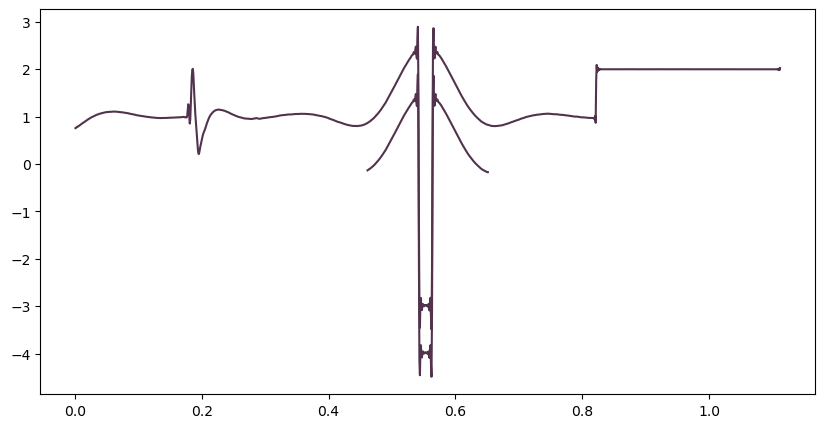

In [21]:
#Plot artifact one
i_elec_artifact=3
i_muscle_i_elec_artifact=5
i_trial_i_muscle_i_elec_artifact=19
init_t_artifact=580
end_t_artifact=820
artifact_number=1
elec_i = list_elecs[i_elec_artifact]
df_subject_no_empty_elec_i = df_subject_no_empty.where(df_subject_no_empty['Elec_config']==elec_i) #df with only sepc electrode
df_subject_no_empty_elec_i.dropna(inplace=True) 
list_muscle_or_other_elec_i = df_subject_no_empty_elec_i['Muscle_or_other'].unique() #Returns the sorted unique elements of an array
n_muscle_or_other_elec_i = len(list_muscle_or_other_elec_i)
muscle_i_elec_i = list_muscle_or_other_elec_i[i_muscle_i_elec_artifact]
print(muscle_i_elec_i)
df_subject_no_empty_elec_i_muscle_i = df_subject_no_empty_elec_i.where(df_subject_no_empty_elec_i['Muscle_or_other']==muscle_i_elec_i)
df_subject_no_empty_elec_i_muscle_i.dropna(inplace=True)
print()
n_trials_elec_i_muscle_i = len(df_subject_no_empty_elec_i_muscle_i)
trial_i_elec_i_muscle_i = df_subject_no_empty_elec_i_muscle_i.iloc[i_trial_i_muscle_i_elec_artifact]
print(df_subject_no_empty_elec_i_muscle_i["Trial_number"])
time_points_trial_i=int(trial_i_elec_i_muscle_i['Time_points']) #number of time points
#evt change dt to 1/time_points_trial_i
time_array = dt*np.arange(1,time_points_trial_i+1) #dt = 1/fs sampling interval( abhängig vom EMG)
trial_i_muscle_i_elec_i_raw = trial_i_elec_i_muscle_i[time_series_key]
plt.figure(figsize = (10,5))
offset = 1.0
plt.plot(time_array[init_t_plot:end_t_plot],trial_i_muscle_i_elec_i_raw[init_t_plot:end_t_plot]+ offset, linewidth = 1.5, color = (i_trial_i_muscle_i_elec_artifact/n_trials_elec_i_muscle_i, 0.2, 0.3)) 
plt.plot(time_array[init_t_artifact:end_t_artifact],trial_i_muscle_i_elec_i_raw[init_t_artifact:end_t_artifact], linewidth = 1.5, color = (i_trial_i_muscle_i_elec_artifact/n_trials_elec_i_muscle_i, 0.2, 0.3)) 
artifact_time_serie = trial_i_muscle_i_elec_i_raw[init_t_artifact:end_t_artifact]

    

In [22]:
print(f"artifact_number:{artifact_number}" )
subject_plots_folder_name=subject+'_plots'
save_folder = os.path.join(data_folder,subject_plots_folder_name)
save_file = subject+"artf"+str(artifact_number)+"_"+str(i_elec_artifact)+"_"+str(i_muscle_i_elec_artifact)+"_"+str(i_trial_i_muscle_i_elec_artifact)+"_"+str(init_t_artifact)+"-"+str(end_t_artifact)+".csv"
save_file_path = os.path.join(save_folder,save_file)
np.savetxt(save_file_path, artifact_time_serie, delimiter=',')

artifact_number:1


In [23]:
# Find the max cross_corr overall for normalization
max_corr_val = -99 #why so high? isnt correlation normally from 0 to 1?
for i_elec in range(n_list_elecs):
    elec_i = list_elecs[i_elec]
    df_subject_no_empty_elec_i = df_subject_no_empty.where(df_subject_no_empty['Elec_config']==elec_i)
    df_subject_no_empty_elec_i.dropna(inplace=True)
    list_muscle_or_other_elec_i = df_subject_no_empty_elec_i['Muscle_or_other'].unique()
    n_muscle_or_other_elec_i = len(list_muscle_or_other_elec_i)
    for i_muscle_or_other_elec_i in range(n_muscle_or_other_elec_i):
        muscle_i_elec_i = list_muscle_or_other_elec_i[i_muscle_or_other_elec_i]
        df_subject_no_empty_elec_i_muscle_i = df_subject_no_empty_elec_i.where(df_subject_no_empty_elec_i['Muscle_or_other']==muscle_i_elec_i)
        df_subject_no_empty_elec_i_muscle_i.dropna(inplace=True)
        n_trials_elec_i_muscle_i = len(df_subject_no_empty_elec_i_muscle_i)
        for i_trials_elec_i_muscle_i in range(n_trials_elec_i_muscle_i):
            trial_i_elec_i_muscle_i = df_subject_no_empty_elec_i_muscle_i.iloc[i_trials_elec_i_muscle_i]
            trial_i_muscle_i_elec_i_raw = trial_i_elec_i_muscle_i[time_series_key]
            corr = sp.signal.correlate(trial_i_muscle_i_elec_i_raw, artifact_time_serie) # saves the correlation betweeen the artifact and the EMG 
            corr_abs = np.abs(corr)  # take abs value of correlation, since we search for pos and neg correlation
            if np.max(corr_abs) > max_corr_val:  #why such a big number?
                max_corr_val = np.max(corr_abs) 


#now plot the new code?

In [24]:
th_corr = 0.6
n_t_points_before = 0
n_t_points_after = len(artifact_time_serie)

In [25]:
min_size_transients = 100
beta_value_transients = 1
indices_to_go_back_and_zero = 50
transient_index=-2
end_index_zero_transients=-1

We go now through the data and create the new time-series

In [26]:
# Add the missing columns
df_subject_no_empty['TS_arts_filt_rect_meaned']="$"
df_subject_no_empty['Time_points_arts_filt_rect_meaned']=-1
df_subject_no_empty['TS_arts_1'] ="$"
df_subject_no_empty['Time_points_arts_1'] =-1
df_subject_no_empty['TS_arts_2'] ="$"
df_subject_no_empty['Time_points_arts_2']=-1
df_subject_no_empty['TS_arts_filt'] ="$"
df_subject_no_empty['Time_points_arts_filt'] =-1
df_subject_no_empty['TS_arts_filt_rect'] ="$"
df_subject_no_empty['Time_points_arts_filt_rect']=-1
# Loop through the elecs
for i_elec in range(0,n_list_elecs):
    elec_i = list_elecs[i_elec]
    df_subject_no_empty_elec_i = df_subject_no_empty.where(df_subject_no_empty['Elec_config']==elec_i)
    df_subject_no_empty_elec_i.dropna(inplace=True)
    list_muscle_or_other_elec_i = df_subject_no_empty_elec_i['Muscle_or_other'].unique()
    n_muscle_or_other_elec_i = len(list_muscle_or_other_elec_i)
    # Loop through the muscles of the elec_i
    for i_muscle_or_other_elec_i in range(0,n_muscle_or_other_elec_i):
        muscle_i_elec_i = list_muscle_or_other_elec_i[i_muscle_or_other_elec_i]
        df_subject_no_empty_elec_i_muscle_i = df_subject_no_empty_elec_i.where(df_subject_no_empty_elec_i['Muscle_or_other']==muscle_i_elec_i)
        df_subject_no_empty_elec_i_muscle_i.dropna(inplace=True)
        # Loop through the trials of the muscle_i of the elec_i
        n_trials_elec_i_muscle_i = len(df_subject_no_empty_elec_i_muscle_i)
        for i_trials_elec_i_muscle_i in range(n_trials_elec_i_muscle_i):
            trial_i_elec_i_muscle_i = df_subject_no_empty_elec_i_muscle_i.iloc[i_trials_elec_i_muscle_i]
            trial_i_elec_i_muscle_i_trial_index = trial_i_elec_i_muscle_i.name
            time_points_trial_i=int(trial_i_elec_i_muscle_i['Time_points'])
            trial_i_muscle_i_elec_i_raw = trial_i_elec_i_muscle_i["Raw"]
            trial_i_muscle_i_elec_i_raw_to_zero = trial_i_muscle_i_elec_i_raw.copy()
            corr = sp.signal.correlate(trial_i_muscle_i_elec_i_raw, artifact_time_serie)
            lags = sp.signal.correlation_lags(len(trial_i_muscle_i_elec_i_raw), len(artifact_time_serie))
            corr_abs = np.abs(corr)
            corr_abs /= max_corr_val
            indices_to_delete = np.where(corr_abs>th_corr)[0] - (len(artifact_time_serie))
            for i_index_to_delete in range(len(indices_to_delete)):
                index_to_delete_i = indices_to_delete[i_index_to_delete]
                trial_i_muscle_i_elec_i_raw_to_zero[index_to_delete_i-n_t_points_before:index_to_delete_i+n_t_points_after] = 0
            # algo_c = rpt.KernelCPD(kernel="rbf", min_size=min_size_transients).fit(trial_i_muscle_i_elec_i_raw) 
            # penalty_value = beta_value_transients  # beta
            # bkps_c = algo_c.predict(pen=penalty_value)
            # putting_to_zero_index = bkps_c[transient_index]-indices_to_go_back_and_zero
            # trial_i_muscle_i_elec_i_raw_to_zero_bis = trial_i_muscle_i_elec_i_raw_to_zero.copy()
            # index_for_zero = int(putting_to_zero_index)
            # trial_i_muscle_i_elec_i_raw_to_zero_bis[index_for_zero:end_index_zero_transients] = 0
            # Saving in the dataframe
            df_subject_no_empty.at[trial_i_elec_i_muscle_i_trial_index,'TS_arts_1'] = trial_i_muscle_i_elec_i_raw_to_zero
            df_subject_no_empty.at[trial_i_elec_i_muscle_i_trial_index,'Time_points_arts_1'] = len(trial_i_muscle_i_elec_i_raw_to_zero)
            # df_subject_no_empty.at[trial_i_elec_i_muscle_i_trial_index,'TS_arts_2'] = trial_i_muscle_i_elec_i_raw_to_zero_bis
            # df_subject_no_empty.at[trial_i_elec_i_muscle_i_trial_index,'Time_points_arts_2'] = len(trial_i_muscle_i_elec_i_raw_to_zero_bis)
            # trial_i_muscle_i_elec_i_filtered = sp.signal.sosfilt(butter_sos_filter, trial_i_muscle_i_elec_i_raw_to_zero_bis)
            # df_subject_no_empty.at[trial_i_elec_i_muscle_i_trial_index,'TS_arts_filt'] = trial_i_muscle_i_elec_i_filtered
            # df_subject_no_empty.at[trial_i_elec_i_muscle_i_trial_index,'Time_points_arts_filt'] = len(trial_i_muscle_i_elec_i_filtered)
            # trial_i_muscle_i_elec_i_filtered_rectified = np.abs(trial_i_muscle_i_elec_i_filtered)
            # df_subject_no_empty.at[trial_i_elec_i_muscle_i_trial_index,'TS_arts_filt_rect'] = trial_i_muscle_i_elec_i_filtered_rectified
            # df_subject_no_empty.at[trial_i_elec_i_muscle_i_trial_index,'Time_points_arts_filt_rect'] = len(trial_i_muscle_i_elec_i_filtered_rectified)
            # trial_i_muscle_i_elec_i_filtered_rectified_meaned = sp.ndimage.filters.uniform_filter1d(trial_i_muscle_i_elec_i_filtered_rectified,size=average_window_filter_size)
            # df_subject_no_empty.at[trial_i_elec_i_muscle_i_trial_index,'TS_arts_filt_rect_meaned'] = trial_i_muscle_i_elec_i_filtered_rectified_meaned
            # df_subject_no_empty.at[trial_i_elec_i_muscle_i_trial_index,'Time_points_arts_filt_rect_meaned'] = len(trial_i_muscle_i_elec_i_filtered_rectified_meaned)            

In [27]:
#1.Extract index number of trial where the artifact is with 
#plot
#use cross-corr from sergio 
#check if if is gone

print("index number")
df_subject_no_empty_elec_i.index.where((df_subject_no_empty['Elec_config']==3)&(df_subject_no_empty['Trial_number']==19)(df_subject_no_empty['Muscle_or_other']=="VLat")).dropna()

print("Plotting Artifact")

i_elec_artifact=3
i_muscle_i_elec_artifact=5
i_trial_i_muscle_i_elec_artifact=19
init_t_artifact=580
end_t_artifact=820
artifact_number=1
elec_i = list_elecs[i_elec_artifact]
df_subject_no_empty_elec_i = df_subject_no_empty.where(df_subject_no_empty['Elec_config']==elec_i) #df with only sepc electrode
df_subject_no_empty_elec_i.dropna(inplace=True) 
list_muscle_or_other_elec_i = df_subject_no_empty_elec_i['Muscle_or_other'].unique() #Returns the sorted unique elements of an array
n_muscle_or_other_elec_i = len(list_muscle_or_other_elec_i)
muscle_i_elec_i = list_muscle_or_other_elec_i[i_muscle_i_elec_artifact]
print(muscle_i_elec_i)
df_subject_no_empty_elec_i_muscle_i = df_subject_no_empty_elec_i.where(df_subject_no_empty_elec_i['Muscle_or_other']==muscle_i_elec_i)
df_subject_no_empty_elec_i_muscle_i.dropna(inplace=True)
print()
n_trials_elec_i_muscle_i = len(df_subject_no_empty_elec_i_muscle_i)
trial_i_elec_i_muscle_i = df_subject_no_empty_elec_i_muscle_i.iloc[i_trial_i_muscle_i_elec_artifact]
print(df_subject_no_empty_elec_i_muscle_i["Trial_number"])
time_points_trial_i=int(trial_i_elec_i_muscle_i['Time_points']) #number of time points
#evt change dt to 1/time_points_trial_i
time_array = dt*np.arange(1,time_points_trial_i+1) #dt = 1/fs sampling interval( abhängig vom EMG)
trial_i_muscle_i_elec_i_raw = trial_i_elec_i_muscle_i[time_series_key]
plt.figure(figsize = (10,5))
offset = 1.0
plt.plot(time_array[init_t_plot:end_t_plot],trial_i_muscle_i_elec_i_raw[init_t_plot:end_t_plot]+ offset, linewidth = 1.5, color = (i_trial_i_muscle_i_elec_artifact/n_trials_elec_i_muscle_i, 0.2, 0.3)) 
plt.plot(time_array[init_t_artifact:end_t_artifact],trial_i_muscle_i_elec_i_raw[init_t_artifact:end_t_artifact], linewidth = 1.5, color = (i_trial_i_muscle_i_elec_artifact/n_trials_elec_i_muscle_i, 0.2, 0.3)) 
artifact_time_serie = trial_i_muscle_i_elec_i_raw[init_t_artifact:end_t_artifact]

#administering cross corr
shifted_version=[()]


index number


TypeError: 'Series' object is not callable

In [ ]:
# df_subject_no_empty.where((df_subject_no_empty['Elec_config']==3)&(df_subject_no_empty['Trial_number']==19)&(df_subject_no_empty['Muscle_or_other']=="VLat")).index
print(df_subject_no_empty.where(df_subject_no_empty['Elec_config']=="Elec03_"))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate two series that are correlated
original_x = pd.Series(np.random.uniform(size=100))
original_y = 1.3*original_x + np.random.normal(0, 0.1, size=100)

# Now create shifted versions,
# I create two examples, one where x is shifted
# and one where y is.
shifted_versions = [
    (original_x.iloc[10:].reset_index(drop=True), original_y),
    (original_x, original_y.iloc[20:].reset_index(drop=True)),
]

# Function to calculate correlation
def correlation(x, y):
    shortest = min(x.shape[0], y.shape[0])
    return np.corrcoef(x.iloc[:shortest].values, y.iloc[:shortest].values)[0, 1]

# Function to plot time series and show the correlation
def plot_correlation(x, y, text):
    # plot 
    plt.subplots(figsize=(10, 6))
    x.plot(label="x")
    y.plot(label="y")
    plt.title(f"Correlation {text}: {correlation(x, y)}")
    plt.legend(loc="best")
    plt.show()

# Show results without shifting
for x, y in shifted_versions:
    plot_correlation(x, y, "before shifting")

### Second artifact

In [ ]:
# #Plot artifact two
# plot_artifact(i_elec_artifact=1,i_muscle_i_elec_artifact=3,i_trial_i_muscle_i_elec_artifact=63,init_t_artifact=0,end_t_artifact=390, artifact_number=2)

i_elec_artifact=3
i_muscle_i_elec_artifact=5
i_trial_i_muscle_i_elec_artifact=19
init_t_artifact=580
end_t_artifact=820
artifact_number=1
elec_i = list_elecs[i_elec_artifact]
df_subject_no_empty_elec_i = df_subject_no_empty.where(df_subject_no_empty['Elec_config']==elec_i) #df with only sepc electrode
df_subject_no_empty_elec_i.dropna(inplace=True) 
list_muscle_or_other_elec_i = df_subject_no_empty_elec_i['Muscle_or_other'].unique() #Returns the sorted unique elements of an array
n_muscle_or_other_elec_i = len(list_muscle_or_other_elec_i)
muscle_i_elec_i = list_muscle_or_other_elec_i[i_muscle_i_elec_artifact]
print(muscle_i_elec_i)
df_subject_no_empty_elec_i_muscle_i = df_subject_no_empty_elec_i.where(df_subject_no_empty_elec_i['Muscle_or_other']==muscle_i_elec_i)
df_subject_no_empty_elec_i_muscle_i.dropna(inplace=True)
print()
n_trials_elec_i_muscle_i = len(df_subject_no_empty_elec_i_muscle_i)
trial_i_elec_i_muscle_i = df_subject_no_empty_elec_i_muscle_i.iloc[i_trial_i_muscle_i_elec_artifact]
print(df_subject_no_empty_elec_i_muscle_i["Trial_number"])
time_points_trial_i=int(trial_i_elec_i_muscle_i['Time_points']) #number of time points
#evt change dt to 1/time_points_trial_i
time_array = dt*np.arange(1,time_points_trial_i+1) #dt = 1/fs sampling interval( abhängig vom EMG)
trial_i_muscle_i_elec_i_raw = trial_i_elec_i_muscle_i[time_series_key]
plt.figure(figsize = (10,5))
offset = 1.0
plt.plot(time_array[init_t_plot:end_t_plot],trial_i_muscle_i_elec_i_raw[init_t_plot:end_t_plot]+ offset, linewidth = 1.5, color = (i_trial_i_muscle_i_elec_artifact/n_trials_elec_i_muscle_i, 0.2, 0.3)) 
plt.plot(time_array[init_t_artifact:end_t_artifact],trial_i_muscle_i_elec_i_raw[init_t_artifact:end_t_artifact], linewidth = 1.5, color = (i_trial_i_muscle_i_elec_artifact/n_trials_elec_i_muscle_i, 0.2, 0.3)) 
artifact_time_serie = trial_i_muscle_i_elec_i_raw[init_t_artifact:end_t_artifact]

In [ ]:
#save artifact
print(f"artifact_number:{artifact_number}" )
subject_plots_folder_name=subject+'_plots'
save_folder = os.path.join(data_folder,subject_plots_folder_name)
save_file = subject+"artf"+str(artifact_number)+"_"+str(i_elec_artifact)+"_"+str(i_muscle_i_elec_artifact)+"_"+str(i_trial_i_muscle_i_elec_artifact)+"_"+str(init_t_artifact)+"-"+str(end_t_artifact)+".csv"
save_file_path = os.path.join(save_folder,save_file)
np.savetxt(save_file_path, artifact_time_serie, delimiter=',')

In [ ]:
# Find the max cross_corr overall for normalization
max_corr_val = -99 #why so high? isnt correlation normally from 0 to 1?
for i_elec in range(n_list_elecs):
    elec_i = list_elecs[i_elec]
    df_subject_no_empty_elec_i = df_subject_no_empty.where(df_subject_no_empty['Elec_config']==elec_i)
    df_subject_no_empty_elec_i.dropna(inplace=True)
    list_muscle_or_other_elec_i = df_subject_no_empty_elec_i['Muscle_or_other'].unique()
    n_muscle_or_other_elec_i = len(list_muscle_or_other_elec_i)
    for i_muscle_or_other_elec_i in range(n_muscle_or_other_elec_i):
        muscle_i_elec_i = list_muscle_or_other_elec_i[i_muscle_or_other_elec_i]
        df_subject_no_empty_elec_i_muscle_i = df_subject_no_empty_elec_i.where(df_subject_no_empty_elec_i['Muscle_or_other']==muscle_i_elec_i)
        df_subject_no_empty_elec_i_muscle_i.dropna(inplace=True)
        n_trials_elec_i_muscle_i = len(df_subject_no_empty_elec_i_muscle_i)
        for i_trials_elec_i_muscle_i in range(n_trials_elec_i_muscle_i):
            trial_i_elec_i_muscle_i = df_subject_no_empty_elec_i_muscle_i.iloc[i_trials_elec_i_muscle_i]
            trial_i_muscle_i_elec_i_raw = trial_i_elec_i_muscle_i[time_series_key]
            corr = sp.signal.correlate(trial_i_muscle_i_elec_i_raw, artifact_time_serie) # saves the correlation betweeen the artifact and the EMG 
            corr_abs = np.abs(corr)  # take abs value of correlation, since we search for pos and neg correlation
            if np.max(corr_abs) > max_corr_val:  #why such a big number?
                max_corr_val = np.max(corr_abs) 

### Third artifact

In [ ]:
# #plot third artifact
# plot_artifact(i_elec_artifact=3, i_muscle_i_elec_artifact=7, i_trial_i_muscle_i_elec_artifact=27, init_t_artifact=100, end_t_artifact=590, artifact_number=3)

### Fourth artifact

In [ ]:
#plot fourth artifact
# plot_artifact(i_elec_artifact=1, i_muscle_i_elec_artifact=10, i_trial_i_muscle_i_elec_artifact=46, init_t_artifact=550, end_t_artifact=1400, artifact_number=4)

# Now we can plot and save the filtered data

In [ ]:
# save_flag=1
# subject_plots_folder_name=subject+'_plots'
# save_folder = os.path.join(data_folder,subject_plots_folder_name,"Arts_2_complete")
# os.makedirs(save_folder,exist_ok=True)

In [ ]:
time_series_key='TS_arts_2'
time_points_key='Time_points_arts_2'
init_t_plot = 0
end_t_plot = -1

In [ ]:
###Plot all the graphs
#to run set run =1
run=1
if run ==1:
    list_elecs = df_subject_no_empty['Elec_config'].unique()
    n_list_elecs = len(list_elecs)
    for i_elec in range(n_list_elecs):
        elec_i = list_elecs[i_elec]
        df_subject_no_empty_elec_i = df_subject_no_empty.where(df_subject_no_empty['Elec_config']==elec_i)
        df_subject_no_empty_elec_i.dropna(inplace=True)
        list_muscle_or_other_elec_i = df_subject_no_empty_elec_i['Muscle_or_other'].unique()
        n_muscle_or_other_elec_i = len(list_muscle_or_other_elec_i)
        for i_muscle_or_other_elec_i in range(n_muscle_or_other_elec_i):
            muscle_i_elec_i = list_muscle_or_other_elec_i[i_muscle_or_other_elec_i]
            df_subject_no_empty_elec_i_muscle_i = df_subject_no_empty_elec_i.where(df_subject_no_empty_elec_i['Muscle_or_other']==muscle_i_elec_i)
            df_subject_no_empty_elec_i_muscle_i.dropna(inplace=True)
            plot_trial_elec_i_muscle_i(df_subject_no_empty_elec_i_muscle_i,elec_i=elec_i, muscle_i_elec_i=muscle_i_elec_i, time_series_key=time_series_key,time_points_key=time_points_key,init_t_plot =init_t_plot ,end_t_plot =end_t_plot ,save_flag=save_flag,save_folder=save_folder)

# Organize the data

In [ ]:
###Save every index of df subject into an object ###

#to run data set run=1
run=0

class DfSubject:
    def __init__(self, idx):
        self.idx=idx
        self.Trial_number= df_subject.loc[df_subject.index==self.idx]["Trial_number"]
        self.Raw= df_subject.loc[df_subject.index==self.idx]["Raw"]
        self.Time_points= df_subject.loc[df_subject.index==self.idx]["Time_points"]
        self.Muscle_or_other= df_subject.loc[df_subject.index==self.idx]["Muscle_or_other"]
        self.Elec_config= df_subject.loc[df_subject.index==self.idx]["Elec_config"]
        self.Subject= df_subject.loc[df_subject.index==self.idx]["Subject"]
        self.Amplitudes= df_subject.loc[df_subject.index==self.idx]["Amplitudes"]
    
    

if run ==1:
    #make a list where index is automatically incorporated into _index_#
    number_to_str=[]
    for number in range (0, len(df_subject)):
        number=number="_"+str(number)+"_"
        number_to_str.append(number)
    
    #Create dic where every index is an object # acess data like this:  pData["_123_"].Raw
    i=0
    pData = {}
    for number in number_to_str:
        pData[number] = DfSubject(i)
        i+=1
    
    
#_0_, _1_, etc.
#Upload the data to pickle file and save files in masterthesis folder #


#Example object
#_1_=DfSubject(1) #print(_1_.Raw)


In [ ]:
### save files as pickle file  to projectome_finder#
#to run set run=1
run=0
if run == 1:
    import pickle
    fh = open('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/DATA_dump.pkl', "wb")
    pickle.dump(pData, fh)
    fh.close()

In [ ]:
### retrieve  dfSubject structured as pData  #
#run the structure of the data before opening the pickle (wihtout creating an object)
# command pData["_0_"].Trial_number=0
import pickle
with open('DATA_Dump.pkl', 'rb') as handle:
    pData = pickle.load(handle)


Data of patientM012...
You chose to see a specific Electrode:
you chose Nr.5 and this is the LVLat muscle
<class 'int'>
type of electrode <class 'int'>
n_trials_elec_i_muscle_i:130
We are printing Raw


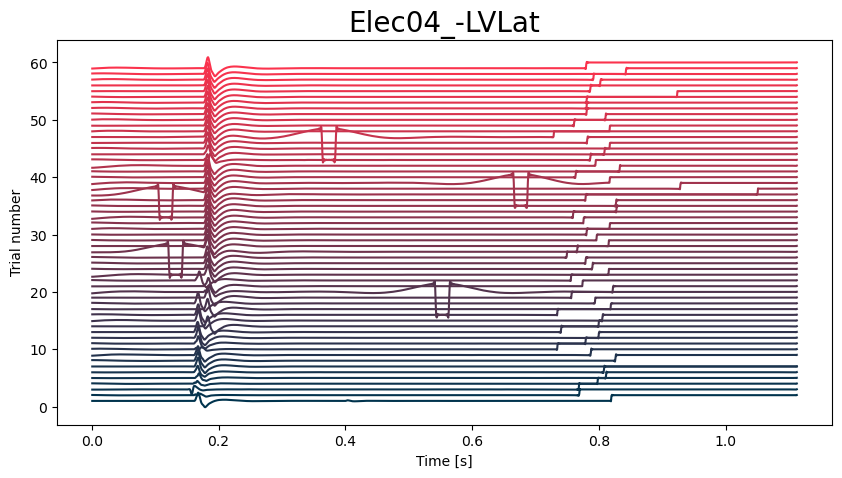

In [ ]:

### Plot a specific muslce and electrode

class EMG_Data_Dic:
    def __init__(self, patient):
        self.patient=patient
        print(f"Data of patient{self.patient}...")
        # self.print_muscle()

    def print_muscle(self):
        print("You chose to see a specific muscle")
        global list_muscle_or_other_elec_i
        muscle_number=int(input(f"(Which muscle do you want to look at? For LST press 0, for RST 1 etc {list_muscle_or_other_elec_i[0:-1]}")) # choose a muscle
        muscle_chosen=list_muscle_or_other_elec_i[muscle_number]
        print(f"you chose Nr.{muscle_number} and this is the {muscle_chosen} muscle")
        
        answer= str(input("Do you want all Electrodes? of that muscle (y/n"))
        if answer == "y":
            list_elecs = df_subject_no_empty['Elec_config'].unique()
            n_list_elecs = len(list_elecs)
            for i_elec in range(n_list_elecs):
                elec_i = list_elecs[i_elec]
                df_subject_no_empty_elec_i = df_subject_no_empty.where(df_subject_no_empty['Elec_config']==elec_i)
                df_subject_no_empty_elec_i.dropna(inplace=True)
                list_muscle_or_other_elec_i = df_subject_no_empty_elec_i['Muscle_or_other'].unique()
                n_muscle_or_other_elec_i = len(list_muscle_or_other_elec_i)
          
                muscle_i_elec_i = list_muscle_or_other_elec_i[muscle_number]
                df_subject_no_empty_elec_i_muscle_i = df_subject_no_empty_elec_i.where(df_subject_no_empty_elec_i['Muscle_or_other']==muscle_i_elec_i)
                df_subject_no_empty_elec_i_muscle_i.dropna(inplace=True)
                plot_trial_elec_i_muscle_i(df_subject_no_empty_elec_i_muscle_i,elec_i=elec_i, muscle_i_elec_i=muscle_i_elec_i, time_series_key=time_series_key,time_points_key=time_points_key,init_t_plot =init_t_plot ,end_t_plot =end_t_plot ,save_flag=save_flag,save_folder=save_folder)
        else:
            self.elec_number= int(input(f"Which electrode do you want press nr to choose: 0 for Elec01, 1 for Elec02 etc.  {elec_names}"))
            #Now output the graphs 
            list_elecs = df_subject_no_empty['Elec_config'].unique()
            n_list_elecs = len(list_elecs)
            elec_i = list_elecs[self.elec_number]
            df_subject_no_empty_elec_i = df_subject_no_empty.where(df_subject_no_empty['Elec_config']==elec_i)
            df_subject_no_empty_elec_i.dropna(inplace=True)
            list_muscle_or_other_elec_i = df_subject_no_empty_elec_i['Muscle_or_other'].unique()
            n_muscle_or_other_elec_i = len(list_muscle_or_other_elec_i)
            muscle_i_elec_i = list_muscle_or_other_elec_i[muscle_number]
            df_subject_no_empty_elec_i_muscle_i = df_subject_no_empty_elec_i.where(df_subject_no_empty_elec_i['Muscle_or_other']==muscle_i_elec_i)
            df_subject_no_empty_elec_i_muscle_i.dropna(inplace=True)
            plot_trial_elec_i_muscle_i(df_subject_no_empty_elec_i_muscle_i,elec_i=elec_i, muscle_i_elec_i=muscle_i_elec_i, time_series_key=time_series_key,time_points_key=time_points_key,init_t_plot =init_t_plot ,end_t_plot =end_t_plot ,save_flag=save_flag,save_folder=save_folder)

    def print_Electrode(self):
        print("You chose to see a specific Electrode:")
        global list_muscle_or_other_elec_i, list_elecs
        self.elec_number= int(input(f"Which electrode do you want press nr to choose: {elec_names}"))
        answer=str(input("Do you want all muscles?(y/n)"))
        if answer == "y":
            elec_i = list_elecs[self.elec_number]
            df_subject_no_empty_elec_i = df_subject_no_empty.where(df_subject_no_empty['Elec_config']==elec_i)
            df_subject_no_empty_elec_i.dropna(inplace=True)
            list_muscle_or_other_elec_i = df_subject_no_empty_elec_i['Muscle_or_other'].unique()
            n_muscle_or_other_elec_i = len(list_muscle_or_other_elec_i)
            for i_muscle_or_other_elec_i in range(n_muscle_or_other_elec_i):
                muscle_i_elec_i = list_muscle_or_other_elec_i[i_muscle_or_other_elec_i]
                df_subject_no_empty_elec_i_muscle_i = df_subject_no_empty_elec_i.where(df_subject_no_empty_elec_i['Muscle_or_other']==muscle_i_elec_i)
                df_subject_no_empty_elec_i_muscle_i.dropna(inplace=True)
                print(f"n_trials_elec_i_muscle_i:{n_trials_elec_i_muscle_i}")
                plot_trial_elec_i_muscle_i(df_subject_no_empty_elec_i_muscle_i,elec_i=elec_i, muscle_i_elec_i=muscle_i_elec_i, time_series_key=time_series_key,time_points_key=time_points_key,init_t_plot =init_t_plot ,end_t_plot =end_t_plot ,save_flag=save_flag,save_folder=save_folder)
                
        else:    
            muscle_number=int(input(f"(Which muscle do you want to look at? For LST press 0, for RST 1 etc {list_muscle_or_other_elec_i[0:-1]}")) #input for muscle number
            muscle_chosen=list_muscle_or_other_elec_i[muscle_number] #
            print(f"you chose Nr.{muscle_number} and this is the {muscle_chosen} muscle")
            print(type(muscle_number))
            print(f"type of electrode {type(self.elec_number)}")
            print(df_subject_no_empty_elec_i.where(df_subject_no_empty_elec_i['Muscle_or_other']==muscle_i_elec_i)
            #Now output the graphs 
            list_elecs = df_subject_no_empty['Elec_config'].unique()
            n_list_elecs = len(list_elecs)

            elec_i = list_elecs[self.elec_number]
            df_subject_no_empty_elec_i = df_subject_no_empty.where(df_subject_no_empty['Elec_config']==elec_i)
            df_subject_no_empty_elec_i.dropna(inplace=True)
            list_muscle_or_other_elec_i = df_subject_no_empty_elec_i['Muscle_or_other'].unique()
            n_muscle_or_other_elec_i = len(list_muscle_or_other_elec_i)
            muscle_i_elec_i = list_muscle_or_other_elec_i[muscle_number]
            df_subject_no_empty_elec_i_muscle_i = df_subject_no_empty_elec_i.where(df_subject_no_empty_elec_i['Muscle_or_other']==muscle_i_elec_i)
            df_subject_no_empty_elec_i_muscle_i.dropna(inplace=True)
            print(f"n_trials_elec_i_muscle_i:{n_trials_elec_i_muscle_i}")
            plot_trial_elec_i_muscle_i(df_subject_no_empty_elec_i_muscle_i,elec_i=elec_i, muscle_i_elec_i=muscle_i_elec_i, time_series_key=time_series_key,time_points_key=time_points_key,init_t_plot =init_t_plot ,end_t_plot =end_t_plot ,save_flag=save_flag,save_folder=save_folder)


   


# x=EMG_Data_Dic("M012")
# x.print_Electrode()  
# x.print_muscle()  

# Plots

## Single plots

## Raw EMGs multiplots

## Filter and plot the enveloppe

## Plot the envelope of the filtered signal without the artefacts